<div align='center'>
    
### 3. 공간 데이터를 활용한 시각화
</div>

**사용 라이브러리 정리**

- **requests**: 통신 요청/응답 라이브러리
- **json**: python에서 json 형식을 다루기 위해 필요한 라이브러리
- **pyproj**: 좌표 변환 및 측지연산을 수행하는 파이썬 라이브러리이며 매우 다양한 좌표계를 지원함. GeoPandas 라이브러리가 pypoj를 사용하기 때문에 가장 널리 사용됨.
- **geopandas**: 벡터 데이터 작업을 위한 파이썬 라이브러리이며 벡터 데이터를 DataFrame 객체로 다룰 수 있게 해주는 모듈이다. pandas, pypoj에 의존성을 가진다.
- **shape**: 새로운 점, 선, 면 등의 백터 데이터 지오메트리 객체를 반환하는데 사용하는 라이브러리
- **mapping**: shape file 포맷을 객체로 읽어오고 백터 데이터의 feature 정보를 읽어오는 라이브러리
- **folium**: 벡터 데이터를 지도에 시각화하는 라이브러리

### 1. 공공 데이터 활용

[코로나백신,예방접종센터명,예방접종센터위치](코로나백신,예방접종센터명,예방접종센터위치)

**접근토큰(access Token)**

: SGIS 데이터 API를 활용하기 위해서는 'accessToken'를 항상 얻어와야 한다. 매번 서비스 ID와 보안Key를 이력해서 accessToken을 발급받는 코드를 작성하기 번거롭기 때문에 accessToken을 발급 받는 함수를 미리 정의해둔다.

In [1]:
import requests

### SGIS ACCESS TOKEN을 리턴 해주는 함수
def get_access_token(consumer_key, consumer_secret) -> None:
    temp_res = requests.get(
    url="https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json",
    params={
            "consumer_key": consumer_key,
            "consumer_secret": consumer_secret
        }
    )
    
    access_token = temp_res.json()["result"]["accessToken"]
    return access_token

# 발급 받은 서비스ID, 보안Key 선언
consumer_key = "a20b8d305aec4181af66"   # 서비스ID
consumer_secret = "bab2d8cd60594b2994b4" # 보안Key

# get_access_token('서비스ID', '보안Key')
print('access token: ', get_access_token(consumer_key, consumer_secret))

access token:  ef4e5abe-2ae9-4019-8f85-8254a5f39ad6


In [2]:
import requests
import pandas as pd

### 공공데이터활용지원센터_코로나19 예방접종센터 조회서비스 이용방법
def get_vaccination_center(serviceKey):
    temp_res = requests.get(
        url="https://api.odcloud.kr/api/15077586/v1/centers",
        params={
            "serviceKey": serviceKey
        }
    )

    temp_df = pd.DataFrame(temp_res.json()["data"])
  
    return temp_df

# 일반 인증키(Decoding) 넣기
serviceKey = "a+M1ysyH1/jDZYa2EU0O/etV3OIpOWBFW41NRaX4zLRw4anNkN4NhdruMziukzaUf1ZfpRWh5n4Te2/6CvGrww=="
vaccination_center_df = get_vaccination_center(serviceKey)
vaccination_center_df

,address,centerName,centerType,createdAt,facilityName,id,lat,lng,org,phoneNumber,sido,sigungu,updatedAt,zipCode
0,서울특별시 중구 을지로 39길 29,코로나19 중앙 예방접종센터,중앙/권역,2021-03-03 07:00:52,국립중앙의료원 D동,1,37.567817,127.004501,국립중앙의료원,02-2260-7114,서울특별시,중구,2021-07-16 04:55:08,04562
1,충청남도 천안시 동남구 천안대로 357,코로나19 중부권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,천안시 실내배드민턴장 1층,2,36.779887,127.164717,순천향대 천안병원,,충청남도,천안시 동남구,2021-07-16 04:55:08,31212
2,광주광역시 동구 필문대로 365,코로나19 호남권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,조선대학교병원 의성관 5층,3,35.139465,126.925563,조선대병원,062-220-3739,광주광역시,동구,2021-07-16 04:55:08,61452
3,경상남도 양산시 물금읍 금오로 20,코로나19 영남권역 예방접종센터,중앙/권역,2021-03-03 07:00:53,양산 부산대병원 기숙사동 1층,4,35.3239,129.009337,양산 부산대병원,055-360-6701,경상남도,양산시,2021-07-16 04:55:08,50612
4,대구시 중구 달성로 56,코로나19 대구광역시 중구 예방접종센터,지역,2021-03-03 07:00:53,계명대학교 대구동산병원 별관,5,35.869985,128.583716,,053-661-3955,대구광역시,중구,2021-07-16 04:55:09,41931
5,서울특별시 성동구 고산자로 270,코로나19 서울특별시 성동구 예방접종센터,지역,2021-03-15 00:03:43,성동구청 대강당(3층),6,37.563457,127.036981,,02-2286-5084,서울특별시,성동구,2021-07-16 04:55:09,04750
6,부산 부산진구 시민공원로 73,코로나19 부산광역시 부산진구 예방접종센터,지역,2021-03-15 00:03:43,부산시민공원 시민사랑채,7,35.170182,129.059301,,051-605-8633,부산광역시,부산진구,2021-07-16 04:55:09,47197
7,인천광역시 연수구 경원대로 526,코로나19 인천광역시 연수구 예방접종센터,지역,2021-03-15 00:03:43,선학경기장 선학체육관,8,37.429571,126.703271,,032-749-8121,인천광역시,연수구,2021-07-16 04:55:10,21908
8,광주광역시 서구 금화로 278,코로나19 광주광역시 서구 예방접종센터,지역,2021-03-15 00:03:43,빛고을체육관,9,35.135361,126.8771731,,062-371-8731,광주광역시,서구,2021-07-16 04:55:10,62048
9,대전광역시 유성구 유성대로 978,코로나19 대전광역시 유성구 예방접종센터,지역,2021-03-15 00:03:44,유성종합스포츠센터,10,36.378512,127.344399,,042-611-2498,대전광역시,유성구,2021-07-16 04:55:11,34128


**데이터 활용**

**a. SGIS API를 활용해 서울시의 구 단위 코드 정보 dataframe 생성**

In [3]:
### SGIS ACCESS TOKEN을 리턴 해주는 함수
def get_access_token(consumer_key, consumer_secret) -> None:
    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json",
        params={
            "consumer_key": consumer_key,
            "consumer_secret": consumer_secret
        }
    )
  
    access_token = temp_res.json()["result"]["accessToken"]
  
    return access_token

In [4]:
### SGIS 서비스ID, 보안Key, 시도 코드를 입력받아 시/군/구 단위 지역 정보를 리스트 형태로 리턴받는 함수
def get_sido_info_list(consumer_key, consumer_secret, cd) -> None:
    ACCESS_TOKEN=get_access_token(consumer_key, consumer_secret)
    PARAMS={
        "accessToken": ACCESS_TOKEN,
        "cd": cd # 선택) 최대 5자리, non(default): 시도정보, 2자리: 시군구, 5자리: 읍면동 ## 서울은11
        # "pg_yn": , # 선택) 경계 미포함(default): 0, 경계 포함:1
    }
    
    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/addr/stage.json",
        params=PARAMS
    )
    
    temp_sido_info_list = temp_res.json()["result"]
    return temp_sido_info_list

In [5]:
# 서울시 지역 정보 리스트 가져오기(서울시 시도코드: 11)
temp_seoul_info_list = get_sido_info_list(consumer_key, consumer_secret, 11)
temp_seoul_info_list

[{'y_coor': '1944250',
  'full_addr': '서울특별시 강남구',
  'x_coor': '961366',
  'addr_name': '강남구',
  'cd': '11230'},
 {'y_coor': '1950181',
  'full_addr': '서울특별시 강동구',
  'x_coor': '968817',
  'addr_name': '강동구',
  'cd': '11250'},
 {'y_coor': '1960547',
  'full_addr': '서울특별시 강북구',
  'x_coor': '956880',
  'addr_name': '강북구',
  'cd': '11090'},
 {'y_coor': '1951538',
  'full_addr': '서울특별시 강서구',
  'x_coor': '940183',
  'addr_name': '강서구',
  'cd': '11160'},
 {'y_coor': '1941043',
  'full_addr': '서울특별시 관악구',
  'x_coor': '950955',
  'addr_name': '관악구',
  'cd': '11210'},
 {'y_coor': '1949789',
  'full_addr': '서울특별시 광진구',
  'x_coor': '963406',
  'addr_name': '광진구',
  'cd': '11050'},
 {'y_coor': '1944106',
  'full_addr': '서울특별시 구로구',
  'x_coor': '942116',
  'addr_name': '구로구',
  'cd': '11170'},
 {'y_coor': '1940318',
  'full_addr': '서울특별시 금천구',
  'x_coor': '947013',
  'addr_name': '금천구',
  'cd': '11180'},
 {'y_coor': '1961524',
  'full_addr': '서울특별시 노원구',
  'x_coor': '962515',
  'addr_name': '노원구',
 

: 리스트의 원소로 딕셔너리가 들어가 있다. 이를 데이터 프레임으로 변환.

In [6]:
seoul_info_df = pd.DataFrame(temp_seoul_info_list)
seoul_info_df.head()

,y_coor,full_addr,x_coor,addr_name,cd
0,1944250,서울특별시 강남구,961366,강남구,11230
1,1950181,서울특별시 강동구,968817,강동구,11250
2,1960547,서울특별시 강북구,956880,강북구,11090
3,1951538,서울특별시 강서구,940183,강서구,11160
4,1941043,서울특별시 관악구,950955,관악구,11210


In [7]:
# 컬럼 순으로 순차적 정렬
seoul_info_df = seoul_info_df[["cd", "full_addr", "addr_name", "x_coor", "y_coor"]]
seoul_info_df.head()

,cd,full_addr,addr_name,x_coor,y_coor
0,11230,서울특별시 강남구,강남구,961366,1944250
1,11250,서울특별시 강동구,강동구,968817,1950181
2,11090,서울특별시 강북구,강북구,956880,1960547
3,11160,서울특별시 강서구,강서구,940183,1951538
4,11210,서울특별시 관악구,관악구,950955,1941043


In [8]:
seoul_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cd         25 non-null     object
 1   full_addr  25 non-null     object
 2   addr_name  25 non-null     object
 3   x_coor     25 non-null     object
 4   y_coor     25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


**b. SGIS API를 활용해 서울시의 동 단위 코드 정보 dataframe 생성**

: 위에서 정의한 함수**get_sido_info_list**을 조금 발전시켜서, 지역코드를 활용해 동 단위 정보를 데이터 프레임으로 가져오는 함수를 정의.

In [9]:
### 지역코드를 활용해 동 단위 정보를 데이터 프레임으로 가져오는 함수
def get_cd_df(consumer_key, consumer_secret, cd) -> None:
    ACCESS_TOKEN=get_access_token(consumer_key, consumer_secret)
    PARAMS={
        "accessToken": ACCESS_TOKEN,
        "cd": cd # 선택) 최대 5자리, non(default): 시도정보, 2자리: 시군구, 5자리: 읍면동
        # "pg_yn": , # 선택) 경계 미포함(default): 0, 경계 포함: 1
    }

    res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/addr/stage.json",
        params=PARAMS
    )

    # json -> dataframe
    temp_df = pd.DataFrame(res.json()["result"])

    # 컬럼 순서변경
    temp_df = temp_df[["cd", "full_addr", "addr_name", "x_coor", "y_coor"]]
    
    return temp_df

In [10]:
# 서울특별시 구 코드를 list로 생성
seoul_sig_cd_list = get_cd_df(consumer_key, consumer_secret, 11)["cd"].values.tolist()
seoul_sig_cd_list

['11230',
 '11250',
 '11090',
 '11160',
 '11210',
 '11050',
 '11170',
 '11180',
 '11110',
 '11100',
 '11060',
 '11200',
 '11140',
 '11130',
 '11220',
 '11040',
 '11080',
 '11240',
 '11150',
 '11190',
 '11030',
 '11120',
 '11010',
 '11020',
 '11070']

In [11]:
# seoul_sig_cd_list를 활용해 서울특별시 동단위 정보를 데이터 프레임으로 생성
import time

# 서울특별시의 동 단위 데이터 프레임 (빈 데이터 프레임 생성)
seoul_emd_df = pd.DataFrame()
for cd in seoul_sig_cd_list:
    temp_df = get_cd_df(consumer_key, consumer_secret, int(cd))
    seoul_emd_df = seoul_emd_df.append(temp_df)
    
    time.sleep(0.5) # 0.5초 기다림

seoul_emd_df

,cd,full_addr,addr_name,x_coor,y_coor
0,1123068,서울특별시 강남구 개포1동,개포1동,961300,1942155
1,1123080,서울특별시 강남구 개포2동,개포2동,961901,1942923
2,1123071,서울특별시 강남구 개포4동,개포4동,960508,1941890
3,1123052,서울특별시 강남구 논현1동,논현1동,958154,1945949
4,1123053,서울특별시 강남구 논현2동,논현2동,959014,1946318
...,...,...,...,...,...
11,1107060,서울특별시 중랑구 상봉2동,상봉2동,963276,1955172
12,1107069,서울특별시 중랑구 신내1동,신내1동,965060,1957546
13,1107070,서울특별시 중랑구 신내2동,신내2동,963944,1956921
14,1107061,서울특별시 중랑구 중화1동,중화1동,963212,1956168


**SGIS API를 이용해 농가 통계 데이터를 불러와 DataFrame로 만들기**

: SGIS API에서 농가 통계 데이터를 이용해서 DataFrame로 생성해보자.

먼저 농가 통계 데이터를 리스트 형태로 반환하는 함수를 생성.

In [12]:
### SGIS 서비스ID, 보안Key, 시도 코드를 입력받아 농가 통계 정보를 리스트 형태로 리턴받는 함수
def get_country_info_list(consumer_key, consumer_secret, year) -> None:
    ACCESS_TOKEN=get_access_token(consumer_key, consumer_secret) # 위에서 정의한 get_access_token 사용
    PARAMS={
        "accessToken": ACCESS_TOKEN,
        "year": year, # 연도, (2000, 2005, 2010, 2015)
    }

    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/stats/searchpopulation.json", # 농가 통계 정보 데이터 API 주소를 입력하세요
        params=PARAMS
    )

    temp_country_info_list= temp_res.json()["result"]
    
    return temp_country_info_list

In [13]:
#temp_country_info_list = get_country_info_list("서비스ID", "보안key", #year)
temp_country_info_list = get_country_info_list(consumer_key, consumer_secret, 2015) # 년도(2000,2005,2010, 2015) 선택

country_info_df = pd.DataFrame(temp_country_info_list)# 데이터 프레임 만들기
country_info_df

,adm_cd,adm_nm,avg_age,population
0,11,서울특별시,51.4,9444796
1,21,부산광역시,50.5,3359946
2,22,대구광역시,50.7,2402744
3,23,인천광역시,50.9,2783565
4,24,광주광역시,50.7,1461127
5,25,대전광역시,51.1,1499520
6,26,울산광역시,50.3,1120525
7,29,세종특별자치시,50.3,197651
8,31,경기도,51,11869038
9,32,강원도,50.2,1475324


### 2. GeoPandas를 활용한 공간 데이터 시각화

: GeoPandas는 **파이썬에서 지리정보 데이터 처리의 기하학적 연산과 시각화 등을 돕는 채키지**이다. Pandas와 사용방법이 비슷하고, 공간정보 데이터를 분석하고 시각화 하는데 유용한 매서드가 포함되어 있다. GeoPandas는 **공간정보를 담고 있는 Geometry를 활용해 시각화** 할 수 있다.

GeoPandas의 자료형은 GeoSeries와 GeoDataFrame이다. 두 객체의 **plot()**을 사용하면 Geometry 데이터를 쉽게 시각화할 수 있다. Geometry 데이터는 지리정보를 표현하는 다각형, 선, 점을 의미하는데, 각각 'Polygon, LineString, Point'으로 정의되어 있다.

**Polygon(서울시 행정구역 시각화)**

: SGIS API를 이용해 서울시 행정구역 코드 데이터를 가져와 시각화를 해보자.(서울시 행정구역 코드: 11)

In [17]:
# 필요한 라이브러리 import
import requests
import pprint
import json
import os
import math
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
import folium
import matplotlib.pyplot as plt

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

In [24]:
### Polygon 실습

## 행정구역 코드를 이용한 행정구역 경계 데이터 가져오는 함수 정의
def get_features_json(access_token, si_code) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/boundary/hadmarea.geojson"
    params={
        "accessToken": access_token,
        "year": 2019, # 데이터 기준연도 범위: 2000 ~ 2019 / 2019가 가장 최근 데이터
        "adm_cd": si_code, # 행정구역코드
        "low_search": 0 # 행정구역코드에 해당하는 정보만 요청: 0, 1단계 하위 행정구역 정보 요청: 1, 2단계 하위 행정구역 정보 요청: 2
    }
    
    temp_features_json = requests.get(
        url=url,
        params=params
    ).json()["features"]
    
    return temp_features_json

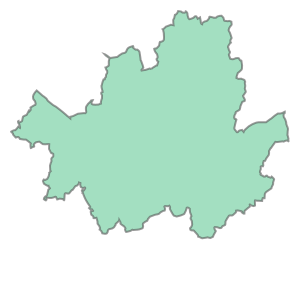

In [25]:
## SGIS access_token 가져오는 함수
access_token = get_access_token(consumer_key, consumer_secret)

## 서울시 행정경계 데이터를 json으로 가져오기
temp_features_json = get_features_json(access_token, 11)

## 서울시 행정경계 데이터의 geometry 읽어오기
temp_shape_data = temp_features_json[0]["geometry"]

## Shape 라이브러리의 Shapely 메서드로 json geometry 읽어와서 시각화 하기
temp_shape = shape(temp_shape_data)
temp_shape

**Point(공공데이터활용지원센터 코로나19 예방접종센터 시각화 실습)**

**get_vaccination_center** 함수 정의: 공공데이터 사이트에서 url, 서비스키를 이용해서 원하는 데이터를 불러와 데이터 프레임으로 변환.

In [26]:
### Point 실습

def get_vaccination_center(serviceKey) -> None:
    temp_res = requests.get(
        url="https://api.odcloud.kr/api/15077586/v1/centers",
        params={
            "serviceKey": serviceKey
        }
    )
    
    temp_df = pd.DataFrame(temp_res.json()["data"])
    
    return temp_df

In [27]:
## 코로나19 예방접종센터 데이터를 데이터 프레임으로 로드
vaccination_center_df = get_vaccination_center(serviceKey)
vaccination_center_df

,address,centerName,centerType,createdAt,facilityName,id,lat,lng,org,phoneNumber,sido,sigungu,updatedAt,zipCode
0,서울특별시 중구 을지로 39길 29,코로나19 중앙 예방접종센터,중앙/권역,2021-03-03 07:00:52,국립중앙의료원 D동,1,37.567817,127.004501,국립중앙의료원,02-2260-7114,서울특별시,중구,2021-07-16 04:55:08,04562
1,충청남도 천안시 동남구 천안대로 357,코로나19 중부권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,천안시 실내배드민턴장 1층,2,36.779887,127.164717,순천향대 천안병원,,충청남도,천안시 동남구,2021-07-16 04:55:08,31212
2,광주광역시 동구 필문대로 365,코로나19 호남권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,조선대학교병원 의성관 5층,3,35.139465,126.925563,조선대병원,062-220-3739,광주광역시,동구,2021-07-16 04:55:08,61452
3,경상남도 양산시 물금읍 금오로 20,코로나19 영남권역 예방접종센터,중앙/권역,2021-03-03 07:00:53,양산 부산대병원 기숙사동 1층,4,35.3239,129.009337,양산 부산대병원,055-360-6701,경상남도,양산시,2021-07-16 04:55:08,50612
4,대구시 중구 달성로 56,코로나19 대구광역시 중구 예방접종센터,지역,2021-03-03 07:00:53,계명대학교 대구동산병원 별관,5,35.869985,128.583716,,053-661-3955,대구광역시,중구,2021-07-16 04:55:09,41931
5,서울특별시 성동구 고산자로 270,코로나19 서울특별시 성동구 예방접종센터,지역,2021-03-15 00:03:43,성동구청 대강당(3층),6,37.563457,127.036981,,02-2286-5084,서울특별시,성동구,2021-07-16 04:55:09,04750
6,부산 부산진구 시민공원로 73,코로나19 부산광역시 부산진구 예방접종센터,지역,2021-03-15 00:03:43,부산시민공원 시민사랑채,7,35.170182,129.059301,,051-605-8633,부산광역시,부산진구,2021-07-16 04:55:09,47197
7,인천광역시 연수구 경원대로 526,코로나19 인천광역시 연수구 예방접종센터,지역,2021-03-15 00:03:43,선학경기장 선학체육관,8,37.429571,126.703271,,032-749-8121,인천광역시,연수구,2021-07-16 04:55:10,21908
8,광주광역시 서구 금화로 278,코로나19 광주광역시 서구 예방접종센터,지역,2021-03-15 00:03:43,빛고을체육관,9,35.135361,126.8771731,,062-371-8731,광주광역시,서구,2021-07-16 04:55:10,62048
9,대전광역시 유성구 유성대로 978,코로나19 대전광역시 유성구 예방접종센터,지역,2021-03-15 00:03:44,유성종합스포츠센터,10,36.378512,127.344399,,042-611-2498,대전광역시,유성구,2021-07-16 04:55:11,34128


: 시각화 진행을 위해서는 위도와 경도 데이터를 활용해야 한다. 현재 위도(lat), 경도(lng)의 데이터 타입은 object이므로 이를 float로 변경해야 한다.

In [28]:
## 위도(lat), 경도(lng)의 데이터 타입을 float로 변경
vaccination_center_df["lat"] = vaccination_center_df["lat"].astype(float)
vaccination_center_df["lng"] = vaccination_center_df["lng"].astype(float)

vaccination_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       10 non-null     object 
 1   centerName    10 non-null     object 
 2   centerType    10 non-null     object 
 3   createdAt     10 non-null     object 
 4   facilityName  10 non-null     object 
 5   id            10 non-null     int64  
 6   lat           10 non-null     float64
 7   lng           10 non-null     float64
 8   org           10 non-null     object 
 9   phoneNumber   10 non-null     object 
 10  sido          10 non-null     object 
 11  sigungu       10 non-null     object 
 12  updatedAt     10 non-null     object 
 13  zipCode       10 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ KB


: 다음은 예방접종센터의 위/경도 데이터를 이용해서 Geometry Point 객체를 생성해야 한다. 여기에서는 **shapely.geometry**의 Point 메소드를 이용.

이후에는 Geopandas DataFrame을 이용해 데이터 프레임 생성.

In [29]:
## 예방접종센터의 위/경도 데이터로 Geometry Point 객체를 생성해서 Geometry 컬럼 생성하기
vaccination_center_df["geometry"] =vaccination_center_df.apply(lambda row: Point([row["lng"], row["lat"]]), axis=1)

## Geopandas DataFrame으로 DataFrame 생성하기
vaccination_center_gpd_df = gpd.GeoDataFrame(vaccination_center_df, geometry="geometry")
vaccination_center_gpd_df

,address,centerName,centerType,createdAt,facilityName,id,lat,lng,org,phoneNumber,sido,sigungu,updatedAt,zipCode,geometry
0,서울특별시 중구 을지로 39길 29,코로나19 중앙 예방접종센터,중앙/권역,2021-03-03 07:00:52,국립중앙의료원 D동,1,37.567817,127.004501,국립중앙의료원,02-2260-7114,서울특별시,중구,2021-07-16 04:55:08,04562,POINT (127.00450 37.56782)
1,충청남도 천안시 동남구 천안대로 357,코로나19 중부권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,천안시 실내배드민턴장 1층,2,36.779887,127.164717,순천향대 천안병원,,충청남도,천안시 동남구,2021-07-16 04:55:08,31212,POINT (127.16472 36.77989)
2,광주광역시 동구 필문대로 365,코로나19 호남권역 예방접종센터,중앙/권역,2021-03-03 07:00:52,조선대학교병원 의성관 5층,3,35.139465,126.925563,조선대병원,062-220-3739,광주광역시,동구,2021-07-16 04:55:08,61452,POINT (126.92556 35.13947)
3,경상남도 양산시 물금읍 금오로 20,코로나19 영남권역 예방접종센터,중앙/권역,2021-03-03 07:00:53,양산 부산대병원 기숙사동 1층,4,35.323900,129.009337,양산 부산대병원,055-360-6701,경상남도,양산시,2021-07-16 04:55:08,50612,POINT (129.00934 35.32390)
4,대구시 중구 달성로 56,코로나19 대구광역시 중구 예방접종센터,지역,2021-03-03 07:00:53,계명대학교 대구동산병원 별관,5,35.869985,128.583716,,053-661-3955,대구광역시,중구,2021-07-16 04:55:09,41931,POINT (128.58372 35.86998)
5,서울특별시 성동구 고산자로 270,코로나19 서울특별시 성동구 예방접종센터,지역,2021-03-15 00:03:43,성동구청 대강당(3층),6,37.563457,127.036981,,02-2286-5084,서울특별시,성동구,2021-07-16 04:55:09,04750,POINT (127.03698 37.56346)
6,부산 부산진구 시민공원로 73,코로나19 부산광역시 부산진구 예방접종센터,지역,2021-03-15 00:03:43,부산시민공원 시민사랑채,7,35.170182,129.059301,,051-605-8633,부산광역시,부산진구,2021-07-16 04:55:09,47197,POINT (129.05930 35.17018)
7,인천광역시 연수구 경원대로 526,코로나19 인천광역시 연수구 예방접종센터,지역,2021-03-15 00:03:43,선학경기장 선학체육관,8,37.429571,126.703271,,032-749-8121,인천광역시,연수구,2021-07-16 04:55:10,21908,POINT (126.70327 37.42957)
8,광주광역시 서구 금화로 278,코로나19 광주광역시 서구 예방접종센터,지역,2021-03-15 00:03:43,빛고을체육관,9,35.135361,126.877173,,062-371-8731,광주광역시,서구,2021-07-16 04:55:10,62048,POINT (126.87717 35.13536)
9,대전광역시 유성구 유성대로 978,코로나19 대전광역시 유성구 예방접종센터,지역,2021-03-15 00:03:44,유성종합스포츠센터,10,36.378512,127.344399,,042-611-2498,대전광역시,유성구,2021-07-16 04:55:11,34128,POINT (127.34440 36.37851)


: 출력된 DataFrame의 Column 중 **getmetry**를 살펴보면 값이 'POINT (127.0045037.56782)'와 같은 형식이다. <br>
geopandas에서 geometry를 출력하게 되면 위와 같이 WKT 형태로 출력이 된다.<br>
WKT는 Well-Known Text이라고 하며 지도, 공간 객체의 공간 참조 시스템(Spatial Reference System) 그리고 공간 참조 시스템 간의 변환을 표현하기 위한 텍스트 마크업 언어이다. WKT로 표현할 수 있는 기하학적 오브젝트는 포인트(Point), 선(Line), 폴리곤(Polygon), TIN 그리고 다각형(Polyhedrons)이다.<br>
위의 데이터는 Point 기하학적 오브젝트임을 알 수 있다.
- [[GIS] WKT(Well-Known Text) Geometry](http://www.gisdeveloper.co.kr/?p=994)

마지막으로 좌표계 확인 (만약 None이라면 좌표계를 정의)

In [30]:
## 좌표계 확인
# None 값인 경우 좌표계를 정의 해주어야 합니다.
print(vaccination_center_gpd_df.crs)

None


In [31]:
## 위/경도 좌표계 정의
# 위/경도 좌표계 EPSG 코드 -> epsg:4326은 좌표계에서 wgs84 범주에 포함됩니다.
vaccination_center_gpd_df.crs = {"init": "epsg:4326"}
vaccination_center_gpd_df.crs

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

캔버스 사이즈를 정의하고 코로나19 예방접종센터의 Point 시각화.

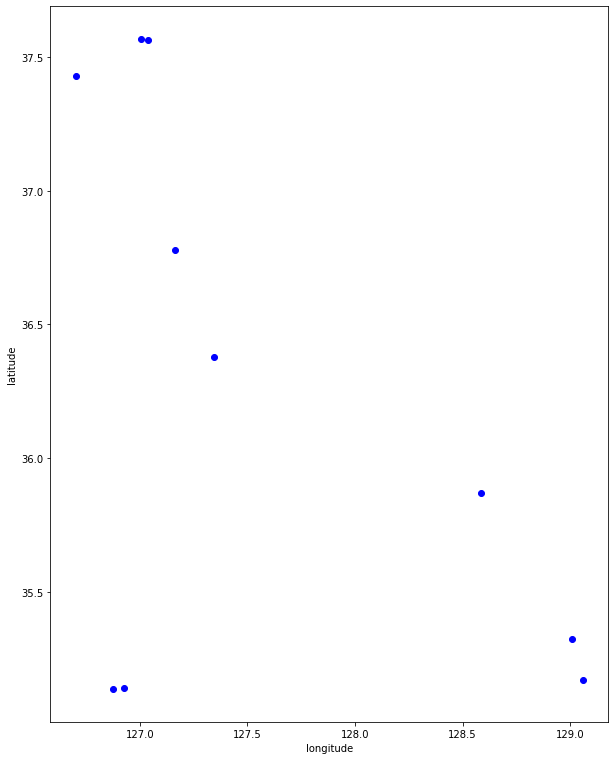

In [32]:
# 캔버스 사이즈 정의
plt.rcParams['figure.figsize']=(10,20)

## 시각화
vaccination_center_gpd_df.plot(
    color="blue",
    label="vaccination_center"
)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

**Line(서울시 도로 시각화)**

: 이 데이터에는 서울시 도로의 시점과 종점, 도로명부여의 기본정보가 포함되어 있다.

In [33]:
! mkdir -p ~/aiffel/socar_gis/data  
! ln -s ~/data/* ~/aiffel/socar_gis/data 
### Line 실습
### 서울시 도로 공간 데이터를 Geopanda DataFrame으로 읽어오기
import os
path = os.getenv('HOME') +'/aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.shp'
seoul_line_geo_df = gpd.read_file(
    path, # file_name
    encoding="cp949" # 한글깨짐 현상 방지
)

seoul_line_geo_df.head()

ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/20190124_seoul_bus.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/korea_seoul_sig.json': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/train_station_info.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.dbf': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.shp': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.shx': File exists


,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,...,1518,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (208869.824 454864.254, 208888.820 ..."
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,409,장위동 311-42 천,한천로,3005038,2.0,11840.0,3,11290,2,"LINESTRING (205126.997 457288.152, 205123.562 ..."
2,20100617,경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Kyungheedae-ro 1-gil,None,직권수정(속성변경),99,20100617,20190607163749,회기동 16-61,...,5,회기동 60-90,경희대로1길,4115019,6.0,109.0,4,11230,3,"LINESTRING (204570.753 454685.702, 204583.290 ..."
3,20100617,홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Hongneung-ro 1ga-gil,None,직권수정(속성변경),99,20100617,20190507100911,제기동 632-20,...,2942,제기동 575-2,홍릉로1가길,4115654,1.0,31.0,4,11230,3,"LINESTRING (203722.326 453424.336, 203700.572 ..."
4,20100514,장위로에서 분기되는 도로구간으로 해당 일련번호 부여,10,Jangwi-ro 40-gil,20130528,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20130528203251,장위동 74-5대,...,1560,장위동 66-294대,장위로40길,4121578,5.0,12.0,4,11290,3,"LINESTRING (204587.026 457063.735, 204590.052 ..."


: 생성된 geopandas 데이터 프레임을 이용하여 시각화 진행. plot 메소드를 이용하면 간단히 생성 가능하다.

<AxesSubplot:>

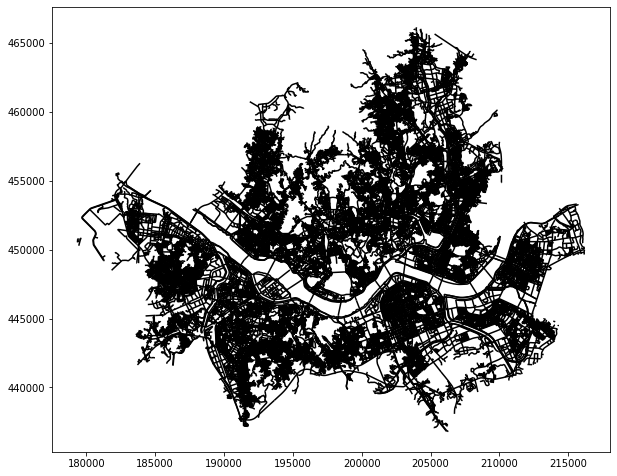

In [34]:
## 시각화 하기
# 캔버스 사이즈 정의
plt.rcParams['figure.figsize']=(10,20)

# Line 시각화
seoul_line_geo_df.plot(
    color="black"
)

### 3. 좌표계 변환

**Geopandas를 활용한 좌표계 변환 방법**

인천공항의 주소 데이터를 가져와서 Geopandas DataFrame로 생성한 후, UTM-K 좌표계로 되어 있는 좌표를 위/경도 좌표계로 변경할 예정.
-[SGIS API 활용 정보 링크](https://sgis.kostat.go.kr/developer/html/openApi/api/data.html#52)

앞서 정의했던 **get_access_token**을 이용해서 access token을 가져온다. 입력 인수는 SGIS 사이트의 인증키에서 **서비스ID, 보안Key**이다.

그리고 **get_address_info** 함수는 access token과 주소를 입력해 DataFrame을 반환하는 함수이다.

In [35]:
## SGIS access_token 가져오기
access_token = get_access_token(consumer_key, consumer_secret)

## 주소를 입력해 주소의 데이터를 DataFrame으로 가지고오는 함수
def get_adress_info(access_token, address) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/addr/geocode.json"
    params={
        "accessToken": access_token,
        "address": address
    }

    temp_res = requests.get(
        url=url,
        params=params
    ).json()["result"]["resultdata"]

    temp_df = pd.DataFrame(temp_res)

    return temp_df

print("슝~")

슝~


In [36]:
# 인천공항 주소 정보 DataFrame으로 가지고 오기
# 인천공항 주소: 인천 중구 공항로 271
address_df = get_adress_info(access_token, "인천 중구 공항로 271")
address_df

,ri_nm,road_nm_sub_no,sgg_cd,adm_cd,road_nm_main_no,leg_cd,road_nm,bd_matches,bd_sub_nm,addr_type,...,road_cd,bd_main_nm,adm_nm,jibun_main_no,origin_xy,jibun_sub_no,ri_cd,y,leg_nm,x
0,null,0,23010,2301064,271,2811014700,공항로,4,null,6,...,3149003,인천국제공항역,운서동,null,BUILD,null,2811014700,1939236.69257386,운서동,907316.512763601


위도 (x)와 경도(y)의 연산을 위해 데이터타이을 float로 변경

In [37]:
## 위도(x), 경도(y)의 데이터 타입을 float으로 변경하기
address_df["x"] = address_df["x"].astype(float)
address_df["y"] = address_df["y"].astype(float)

address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ri_nm            1 non-null      object 
 1   road_nm_sub_no   1 non-null      object 
 2   sgg_cd           1 non-null      object 
 3   adm_cd           1 non-null      object 
 4   road_nm_main_no  1 non-null      object 
 5   leg_cd           1 non-null      object 
 6   road_nm          1 non-null      object 
 7   bd_matches       1 non-null      object 
 8   bd_sub_nm        1 non-null      object 
 9   addr_type        1 non-null      object 
 10  sido_nm          1 non-null      object 
 11  sgg_nm           1 non-null      object 
 12  sido_cd          1 non-null      object 
 13  road_cd          1 non-null      object 
 14  bd_main_nm       1 non-null      object 
 15  adm_nm           1 non-null      object 
 16  jibun_main_no    1 non-null      object 
 17  origin_xy        1 n

: 이제 위/경도 데이터를 이용해서 Geometry Point 객체를 생성해야 한다. **shapely.geometry**의 Point 메소드를 이용.

이후에는 Geopandas DataFrame을 이용해 데이터 프레임 생성.

In [38]:
## 주소정보중 위/경도 데이터로 Geometry Point 객체를 생성해서 Geometry 컬럼 생성하기
address_df["geometry"] = address_df.apply(lambda row: Point([row["x"], row["y"]]), axis=1)

## Geopandas DataFrame으로 DataFrame 생성하기
address_geo_df = gpd.GeoDataFrame(address_df, geometry="geometry")
address_geo_df[["bd_main_nm", "x", "y", "geometry"]]

,bd_main_nm,x,y,geometry
0,인천국제공항역,907316.512764,1.939237e+06,POINT (907316.513 1939236.693)


좌표계를 확인했을 때 'None'이라면 정의.

In [39]:
## 좌표계 확인
# None 값인 경우 좌표계를 정의 해주어야 합니다.
print(address_geo_df.crs)

None


In [40]:
## 위/경도 좌표계 정의
# SGIS 기본 좌표계 UTM-K 좌표계를 사용합니다.
# UTM-K 좌표계의 EPSG코드는 epsg:5179를 사용합니다.
address_geo_df.crs = {"init": "epsg:5179"}
address_geo_df.crs

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: +init=epsg:5179 +type=crs>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

마지막으로 UTM-K 좌표계를 WGS84(위/경도) 좌표계로 변환. WGS84 좌표계의 EPSG코드는 epsg:4326을 사용.

In [41]:
## UTM-K 좌표계 -> WGS84(위/경도) 좌표계 변환
address_geo_df = address_geo_df.to_crs({"init": "epsg:4326"})
address_geo_df[["bd_main_nm", "x", "y", "geometry"]]

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,bd_main_nm,x,y,geometry
0,인천국제공항역,907316.512764,1.939237e+06,POINT (126.45217 37.44768)


**pyproj를 활용한 좌표계 변환 방법**

pyproj 라이브러리를 이용해 좌표계를 변환, 국립 현충원 주소 정보를 이용해 진행.

먼저 SGIS access token을 가져온 후 주소를 입력해 주소의 데이터를 DataFrame로 반환하는 함수 **get_adress_info**을 정의

In [42]:
# 국립 현충원 주소 정보 DataFrame으로 가지고 오기
# 국립 현충원 주소: 서울특별시 동작구 동작동 271-18
address_df = get_adress_info(access_token, "서울특별시 동작구 동작동 271-18")
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y"]]

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y
0,서울특별시,동작구,사당2동,271,18,953475.620000162,1944631.15909765


 pyproj의 Proj, transform 메소드를 이용해서 UTM-K 좌표계를 WGS84(위/경도) 좌표계로 변환하는 함수 **utmk_to_wgs84**를 정의

In [44]:
### UTM-K 좌표계를 WGS84 좌표계로 변환하는 함수
# 좌표계별 EPSG CODE 종류: UTM-K 좌표계(EPSG:5179), WGS84(위/경도 좌표계, EPSG:4326)

def utmk_to_wgs84(utmk_x, utmk_y) -> None:
    utmk_proj = pyproj.Proj(init="EPSG:5179") # UTM-K 좌표계 정의
    wgs84_proj = pyproj.Proj(init="EPSG:4326") # WGS84 좌표계 정의
    
    # 좌표 변환 수헹
    wgs84_x, wgs84_y = pyproj.transform(utmk_proj, wgs84_proj, utmk_x, utmk_y)
    # print(f"UTM-K 위도: {utmk_y} -> WGS84 위도: {wgs84_y} \nUTM-K 경도: {utmk_x} -> WGS84 경도: {wgs84_x}")
    
    
    return wgs84_x, wgs84_y


변환된 좌푯갓을 가져와 DataFrame 컬럼에 추가.

In [45]:
# 변환된 좌푯값을 가져와 데이터 프레임에 컬럼으로 추가하기
address_df[["wgs84_x", "wgs84_y"]] = utmk_to_wgs84(address_df.loc[0, "x"], address_df.loc[0, "y"])
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y", "wgs84_x", "wgs84_y"]]

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_33/3962980595.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  wgs84_x, wgs84_y = pyproj.transform(utmk_proj, w

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y,wgs84_x,wgs84_y
0,서울특별시,동작구,사당2동,271,18,953475.620000162,1944631.15909765,126.973651,37.499772


**SGIS API를 활용한 좌표계 변환**

SGIS API에서 서울시청 주소 데이터를 DataFrame으로 가져와서 SGIS 좌표변환 API를 활용해 좌표계를 변환
- [API 활용 정보 링크](https://sgis.kostat.go.kr/developer/html/openApi/api/data.html#3)
- [좌표계코드참고표 링크](https://sgis.kostat.go.kr/developer/html/openApi/api/dataCode/CoordCode.html)

In [46]:
# 서울시청 주소 정보 DataFrame으로 가지고 오기
# 서울시청 주소: 서울 중구 세종대로 110 서울특별시청
address_df = get_adress_info(access_token, "서울 중구 세종대로 110 서울특별시청")
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y"]]

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y
0,서울특별시,중구,명동,null,null,953893.87330747,1952017.73064447


SGIS 좌표변환 API를 활용해 좌표를 변환하는 함수 **get_transcoord**를 정의하겠습니다. 좌표 변환 후 DataFrame에 변환된 좌표 컬럼을 추가

In [47]:
## SGIS 좌표변환 API를 활용한 좌표변환 함수 정의
def get_transcoord(access_token, src, dst, posX, posY) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/transformation/transcoord.json"
    params={
        "accessToken": access_token,
        "src": src, # 현재 좌표체계
        "dst": dst, # 변환할 좌표체계
        "posX": posX, # 변환할 좌표 X값
        "posY":	posY # 변환할 좌표 Y값
    }

    temp_dict = requests.get(
        url=url,
        params=params
    ).json()["result"]

    return temp_dict["posX"], temp_dict["posY"] # 변환된 좌푯값 딕셔너리의 value 리턴

In [48]:
# 변환후 데이터 프레임에 변환된 좌표 컬럼 추가하기
address_df[["transcoord_x", "transcoord_y"]] = get_transcoord(access_token, "EPSG:5179", "EPSG:4326", address_df.loc[0, "x"], address_df.loc[0, "y"])
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y", "transcoord_x", "transcoord_y"]]

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y,transcoord_x,transcoord_y
0,서울특별시,중구,명동,null,null,953893.87330747,1952017.73064447,126.977918,37.56637


SGIS 좌표변환 API를 이용해 제주공항 주소(**제주 제주시 공항로 2 제주국제공항**)로 좌표 정보를 가져와서 UTM-K 좌표계를 WGS84(위/경도) 좌표계로 변환

In [49]:
# 제주공항 주소 정보 DataFrame으로 가지고 오기
# 제주공항 주소: 제주 제주시 공항로 2 제주국제공항
address_df = get_adress_info(access_token,  "제주 제주시 공항로 2 제주국제공항") # 주소입력
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y"]]

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y
0,제주특별자치도,제주시,용담2동,null,null,906497.939648858,1502114.73637921


In [50]:
# 변환 후 데이터 프레임에 변환된 좌표 컬럼 추가하기
address_df[["transcoord_x", "transcoord_y"]] = get_transcoord(access_token, "EPSG:5179", "EPSG:4326", address_df.loc[0, "x"], address_df.loc[0, "y"])  

###YOUR CODE###
address_df[["sido_nm", "sgg_nm", "adm_nm", "jibun_main_no", "jibun_sub_no", "x", "y", "transcoord_x", "transcoord_y"]]

,sido_nm,sgg_nm,adm_nm,jibun_main_no,jibun_sub_no,x,y,transcoord_x,transcoord_y
0,제주특별자치도,제주시,용담2동,null,null,906497.939648858,1502114.73637921,126.493302,33.506828


### 4. Folium를 활용한 공간 데이터 시각화

이번에는 Folium 라이브러리를 이용해 공간 데이터(점/선/면)를 시각화. <br>
Folium 라이브러리 사용법은 아래 링크를 참고.
- [Folium 라이브러리 사용법 링크](https://python-visualization.github.io/folium/quickstart.html#Getting-Started)
- [Folium 사용방법 참고 자료 링크](https://autogis-site.readthedocs.io/en/latest/notebooks/L5/02_interactive-map-folium.html)

**점(Point) 데이터 시각화**

공공데이터에서 '전국 도시철도 역사정보 표준데이터'를 가져와서 시각화를 진

In [51]:
### 전국도시철도역사정보표준데이터 가져오기

subway_station_info_df = pd.read_csv(os.getenv('HOME') + "/aiffel/socar_gis/data/train_station_info.csv", encoding="cp949")
subway_station_info_df.head()

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자,제공기관코드,제공기관명
0,3122,부평삼거리,S2801,인천지하철 1호선,Bupyeongsamgeori,富平三거리,일반역,-,-,37.478267,126.710494,인천교통공사,인천광역시 부평구 경인로 765,032-516-3122,2020-11-30,B551894,인천교통공사
1,3123,간석오거리,S2801,인천지하철 1호선,Ganseogogeori,間石五거리,일반역,-,-,37.466921,126.707861,인천교통공사,인천광역시 남동구 경인로 674,032-434-3123,2020-11-30,B551894,인천교통공사
2,3124,인천시청,S2801,인천지하철 1호선,Incheon City Hall,仁川市廳,일반역,-,-,37.457615,126.702216,인천교통공사,인천광역시 남동구 예술로 264,032-441-3124,2020-11-30,B551894,인천교통공사
3,3125,예술회관,S2801,인천지하철 1호선,Arts Center,藝術會館,일반역,-,-,37.449334,126.700991,인천교통공사,인천광역시 남동구 예술로 172,032-441-3125,2020-11-30,B551894,인천교통공사
4,3126,인천터미널,S2801,인천지하철 1호선,Incheon Bus Terminal,仁川터미널,일반역,-,-,37.441917,126.699727,인천교통공사,인천광역시 미추홀구 예술로 85,032-441-3126,2020-11-30,B551894,인천교통공사


In [52]:
## 위도(lat), 경도(lng)의 데이터 타입을 float으로 변경하기
subway_station_info_df["역위도"] = subway_station_info_df["역위도"].astype(float)
subway_station_info_df["역경도"] = subway_station_info_df["역경도"].astype(float)

subway_station_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   역번호      1015 non-null   object 
 1   역사명      1015 non-null   object 
 2   노선번호     1015 non-null   object 
 3   노선명      1015 non-null   object 
 4   영문역사명    1015 non-null   object 
 5   한자역사명    1003 non-null   object 
 6   환승역구분    1015 non-null   object 
 7   환승노선번호   236 non-null    object 
 8   환승노선명    275 non-null    object 
 9   역위도      1015 non-null   float64
 10  역경도      1015 non-null   float64
 11  운영기관명    1015 non-null   object 
 12  역사도로명주소  1015 non-null   object 
 13  역사전화번호   1015 non-null   object 
 14  데이터기준일자  1015 non-null   object 
 15  제공기관코드   1015 non-null   object 
 16  제공기관명    1015 non-null   object 
dtypes: float64(2), object(15)
memory usage: 134.9+ KB


Folium을 이용해 시각화를 하기 위해 초기 Map을 생성해야 한다. 또한 초기 Map 메소드에는 초기 중심값 좌표가 들어가야 한다. 먼저 초기 Map을 생성해 출력.

In [53]:
# Folium 초기 Map 객체 생성
# 초기 Map 메소드에는 초기 중심값 좌표가 들어가야 합니다.  
base_map = folium.Map(
    location=[37.566345, 126.977893]
)

base_map

점 데이터를 지도에 시각화해야 하기 때문에 지도에 circle을 찍어본 후 Circle 메소드를 이용해 Folium Map에 점을 표시한다. 여기서는 앞서 생성한 전국도시철도 DataFrame을 이용.

In [54]:
# 지도에 Circle 찍기
for index_num in range(len(subway_station_info_df)):
    folium.Circle(
        location=[subway_station_info_df.loc[index_num, "역위도"], subway_station_info_df.loc[index_num, "역경도"]],
        radius=200,
        color="blue",
        popup=subway_station_info_df.loc[index_num, "역번호"]
    ).add_to(base_map)

base_map

**선(Line) 데이터 시각화**

 서울시 버스 노선 정보를 가져와 시각화

In [55]:
# 버스노선 정보 csv 파일을 DataFrame으로 읽어오기
path = os.getenv('HOME') + '/aiffel/socar_gis/data/20190124_seoul_bus.csv'

bus_line_info_df = pd.read_csv(path)
bus_line_info_df.tail()

,노선ID,노선명,순번,구간ID,정류소ID,ARS-ID,정류소명,X좌표,Y좌표
39358,106900002,중랑02,14,106700969,106900003,7525,면목지구대,127.094202,37.587838
39359,106900002,중랑02,15,106700970,106900025,7526,새마을금고,127.097335,37.589118
39360,106900002,중랑02,16,106700044,106900002,7527,공판장,127.099060,37.588522
39361,106900002,중랑02,17,106700045,106900026,7528,진주빌라.바다약국,127.100669,37.587783
39362,106900002,중랑02,18,106700046,106900023,7529,진로아파트앞.종점,127.101491,37.587650


모든 노선을 시각화하기에는 시간이 오래 걸리기 때문에 노선명이 '중랑02'인 버스노선만 시각화

In [57]:
# 노선명이 중랑02인 버스노선만 필터링
sample_bus_line_info_df = bus_line_info_df[bus_line_info_df["노선명"] == "중랑02"]

# index 초기화
sample_bus_line_info_df = sample_bus_line_info_df.reset_index()

In [58]:
# 중랑02 노선 정류소 이름 리스트 만들기
sample_point_name_list = sample_bus_line_info_df["정류소명"].to_list()

# 중랑02 노선 정류소별 좌표값 리스트로 만들기 
sample_point_list = [[sample_bus_line_info_df.loc[index_num, "Y좌표"], sample_bus_line_info_df.loc[index_num, "X좌표"]] for index_num in range(len(sample_bus_line_info_df))]

점 데이터 시각화할때와 마찬가지로 Folium 초기 Map 객체를 생성한다. 이때 초기 중심값 좌표(여기에서는 서울시 중심부 위도, 경도 값 사용)를 넣어줘야한다.

In [59]:
# Folium 초기 Map 객체를 생성 합니다.
# 초기 Map 메소드에는 초기 중심값 좌표가 들어가야 합니다.

# 서울시 중심부 위도, 경도
center = [37.541, 126.986]

# map이 서울 중심부에 위치하고, zoom 레벨은 10으로 시작 합니다.
map = folium.Map(
    location=center,
    zoom_start=12

)

In [60]:
# 중랑02 노선 정류소별 좌표값 리스트를 이용해 Line 시각화
folium.PolyLine(
    locations=sample_point_list,
    color="red",
    weight=2.5,
    opacity=1
).add_to(map)

In [61]:
map # folium을 이용해 생성한 map 객체 실행

**면(Shape) 데이터 시각화**

서울시 구단위 경계면을 시각화

In [63]:
# 서울시 구단위 경계 데이터 불러오기

seoul_sig_geo_data_path = os.getenv("HOME") + "/aiffel/socar_gis/data/korea_seoul_sig.json"
seoul_sig_geo_data = json.load(
    open(seoul_sig_geo_data_path, encoding="utf-8")
)

In [65]:
# 서울시 중심부 위도, 경도
center = [37.541, 126.986]

# map이 서울 중심부에 위치하고, zoom 레벨은 10으로 시작 합니다.
map = folium.Map(
    location=center,
    zoom_start=10,
    )

In [66]:
# map 객체에 서울시 구 단위 경계 데이터 올리기
folium.GeoJson(
    seoul_sig_geo_data,
    name="seoul_gu"
).add_to(map)

In [67]:
map